In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)
custom_palette = [
    "#D9ED92",  # verde claro amarelado
    "#B5E48C",  # verde claro
    "#99D98C",  # verde médio
    "#76C893",  # verde esverdeado
    "#52B69A",  # verde-água
    "#34A0A4",  # verde-azulado
    "#168AAD",  # azul esverdeado
    "#1A759F",  # azul médio
    "#1E6091",  # azul escuro
    "#184E77",  # azul bem escuro
    "#134770"   # azul mais
]
#plt.style.use("dark_background")
# exam_palette = ["#FFFF00", "#99D98C", "#1A759F"]

Importando base de dados 

In [2]:
df_enem = pd.read_csv("databases/ENEM_2023_FINAL.csv")
display(df_enem)

,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,INTERNET_CASA,EST_IDADE,EST_RENDA_PER_CAP,EST_CELULAR_PER_CAP,EST_COMP_PER_CAP,EST_VEICULO_PER_CAP,EST_ELE_DOM_PER_CAP
0,Masculino,Parda,Privada,510.1,483.8,484.5,492.3,520.0,EM incompleto,ES incompleto,True,19.0,2310.002500,2.250,1.000,0.500000,4.750000
1,Feminino,Branca,Estadual,583.3,474.1,564.6,599.3,660.0,EM incompleto,PG incompleto,True,18.0,1188.001000,0.900,0.400,0.000000,1.800000
2,Masculino,Branca,Privada,646.5,620.7,801.6,585.7,740.0,PG completo,PG completo,True,18.0,2475.001250,0.750,1.125,0.250000,1.500000
3,Feminino,Branca,Privada,553.4,495.1,605.8,554.6,880.0,PG incompleto,PG incompleto,True,17.0,2475.001250,1.125,0.500,0.250000,2.625000
4,Feminino,Branca,Privada,616.3,589.7,682.8,636.7,860.0,PG incompleto,PG incompleto,True,18.0,3300.001667,1.000,1.000,0.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Masculino,Branca,Privada,609.1,613.6,725.2,570.7,800.0,PG completo,PG completo,True,17.0,4950.000833,0.750,0.750,0.333333,1.500000
9996,Feminino,Parda,Estadual,471.6,488.4,597.6,556.4,820.0,EF-2 incompleto,EF-2 incompleto,True,18.0,742.501250,1.125,0.500,0.250000,1.750000
9997,Feminino,Branca,Privada,579.6,616.6,674.5,627.2,580.0,ES incompleto,ES incompleto,True,18.0,1155.001250,1.125,1.125,0.500000,2.375000
9998,Feminino,Branca,Privada,609.2,595.5,625.0,611.3,620.0,Nunca estudou,PG completo,True,17.0,3135.001250,1.125,0.750,0.750000,3.125000


Definição dos títulos dos eixos para cada variável

In [ ]:
titles_dict = {
    "NU_NOTA_CH": {
        "title": "Distribuição da Nota de Ciências Humanas",
        "xlabel": "Nota em Ciências Humanas",
        "ylabel": "Frequência"
    },
    "NU_NOTA_CN": {
        "title": "Distribuição da Nota de Ciências da Natureza",
        "xlabel": "Nota em Ciências da Natureza",
        "ylabel": "Frequência"
    },
    "NU_NOTA_MT": {
        "title": "Distribuição da Nota de Matemática",
        "xlabel": "Nota em Matemática",
        "ylabel": "Frequência"
    },
    "NU_NOTA_LC": {
        "title": "Distribuição da Nota de Linguagens e Códigos",
        "xlabel": "Nota em Linguagens e Códigos",
        "ylabel": "Frequência"
    },
    "NU_NOTA_REDACAO": {
        "title": "Distribuição da Nota de Redação",
        "xlabel": "Nota de Redação",
        "ylabel": "Frequência"
    },
    "EST_IDADE": {
        "title": "Distribuição da Idade dos Participantes",
        "xlabel": "Idade (anos)",
        "ylabel": "Frequência"
    },
    "EST_RENDA_PER_CAP": {
        "title": "Distribuição da Renda Familiar Per Capita",
        "xlabel": "Renda per capita (R$)",
        "ylabel": "Frequência"
    },
    "EST_CELULAR_PER_CAP": {
        "title": "Distribuição de Celulares por Pessoa",
        "xlabel": "Número de celulares por pessoa",
        "ylabel": "Frequência"
    },
    "EST_COMP_PER_CAP": {
        "title": "Distribuição de Computadores por Pessoa",
        "xlabel": "Número de computadores por pessoa",
        "ylabel": "Frequência"
    },
    "EST_VEICULO_PER_CAP": {
        "title": "Distribuição de Veículos por Pessoa",
        "xlabel": "Número de veículos por pessoa",
        "ylabel": "Frequência"
    },
    "EST_ELE_DOM_PER_CAP": {
        "title": "Distribuição de Eletrodomésticos por Pessoa",
        "xlabel": "Número de eletrodomésticos por pessoa",
        "ylabel": "Frequência"
    }
}

Boxplots

In [ ]:
grade_cols = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "EST_IDADE", "EST_RENDA_PER_CAP", "EST_CELULAR_PER_CAP","EST_COMP_PER_CAP", "EST_VEICULO_PER_CAP", "EST_ELE_DOM_PER_CAP"]

def plot_single_boxplots(df: pd.DataFrame, cols: list, colors: list, titles:dict):
    for col, color in zip(cols, colors):
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], color=color)   # só uma nota por vez
        plt.title(titles[col]["title"])
        plt.xlabel(titles[col]["xlabel"])

        #Tornar fundo transparente
        # plt.gca().set_facecolor("none")  # Fundo do gráfico
        # plt.gcf().patch.set_alpha(0)      # Fundo da figura

        # Salvar com transparência
        plt.savefig(f"images/boxplot/{col}.png", transparent=False, dpi=300)
        plt.show()

# Chamada
plot_single_boxplots(df_enem, grade_cols, custom_palette, titles_dict)

Histogramas

In [ ]:
grade_cols = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "EST_IDADE", "EST_RENDA_PER_CAP", "EST_CELULAR_PER_CAP","EST_COMP_PER_CAP", "EST_VEICULO_PER_CAP", "EST_ELE_DOM_PER_CAP"]

def plot_single_histograms(df: pd.DataFrame, cols: list[str], colors: list[str], titles:dict):
    for col, color in zip(cols, colors):
        plt.figure(figsize=(6,4))
        sns.histplot(data=df, x=col, kde=True, color=color, edgecolor="white")
        plt.title(titles[col]["title"])
        plt.xlabel(titles[col]["xlabel"])
        plt.ylabel(titles[col]["ylabel"])

        # fundo transparente
        # plt.gca().set_facecolor("none")  # área do gráfico
        # plt.gcf().patch.set_alpha(0)     # figura inteira

        # salva com fundo transparente
        plt.savefig(f"images/histogram/{col}.png", transparent=False, dpi=300)
        plt.show()

plot_single_histograms(df_enem, grade_cols, custom_palette, titles_dict)

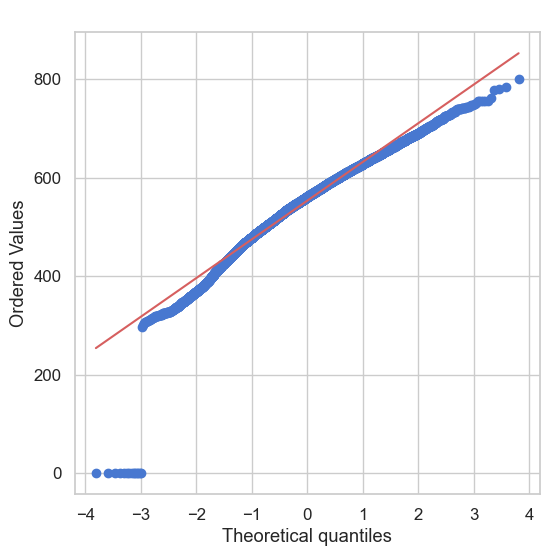

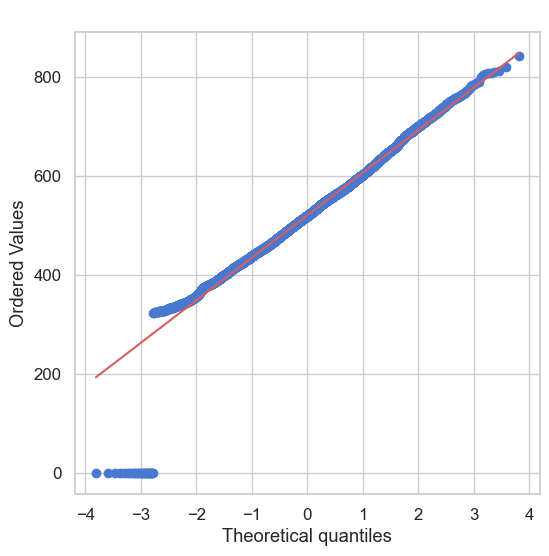

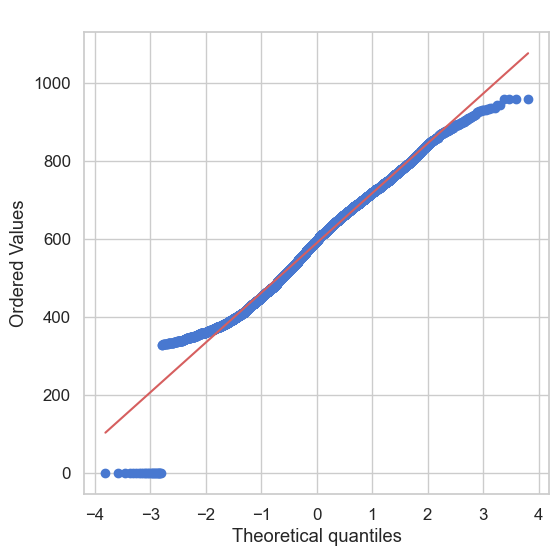

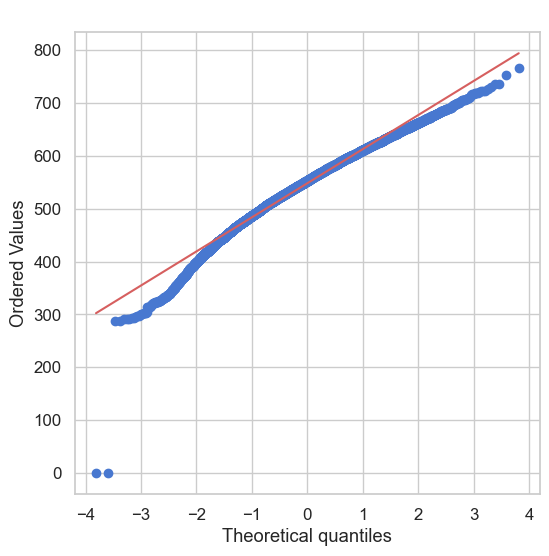

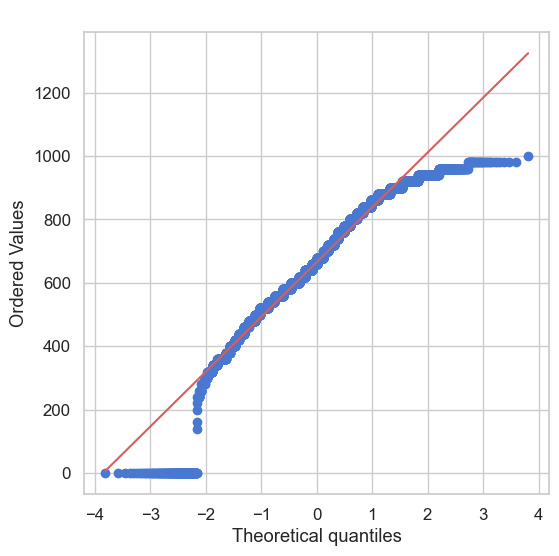

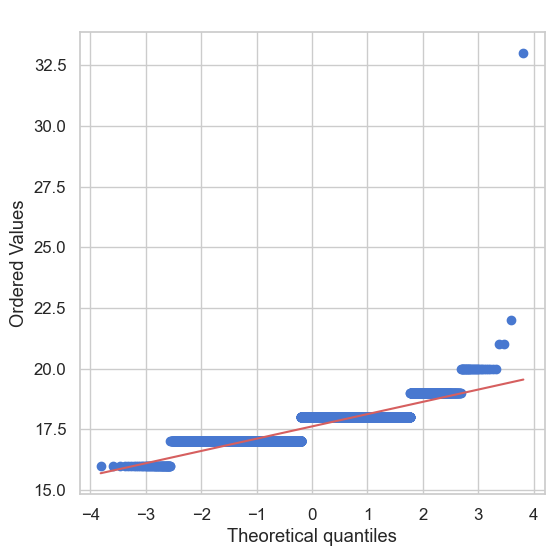

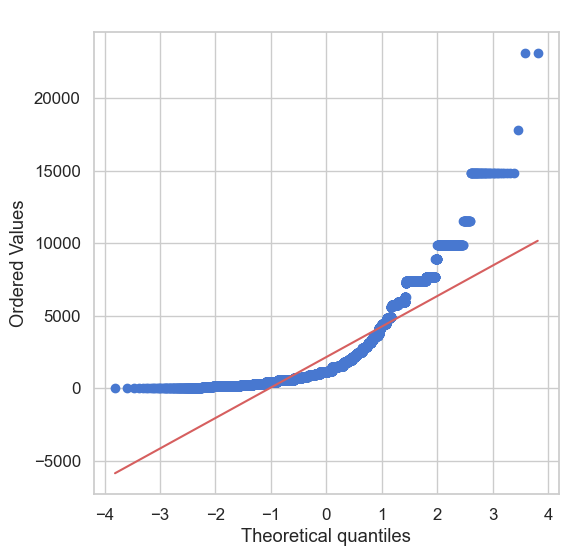

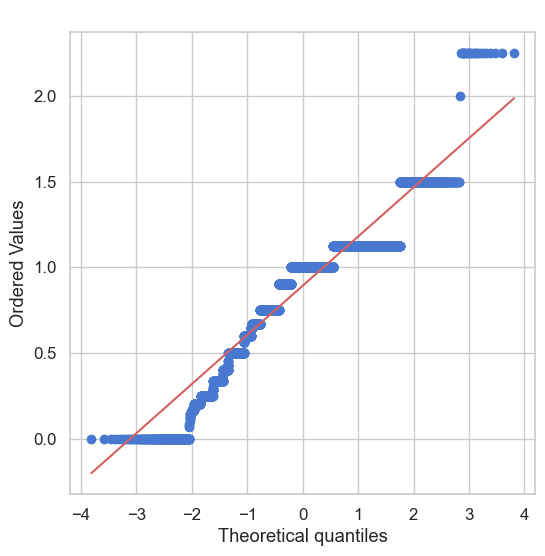

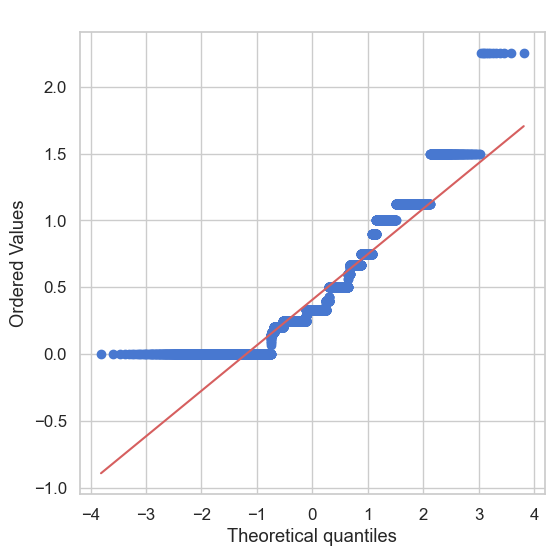

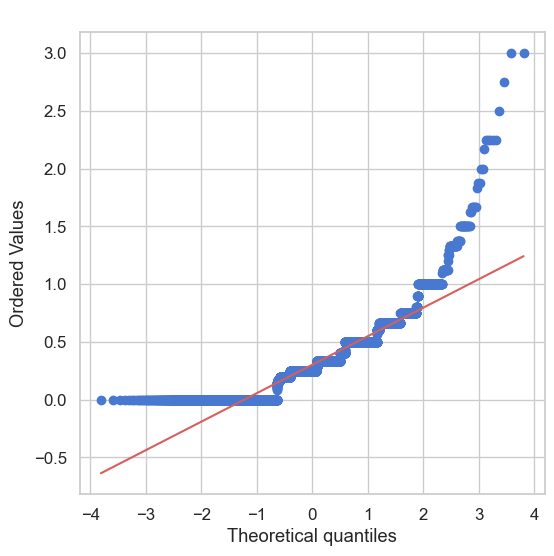

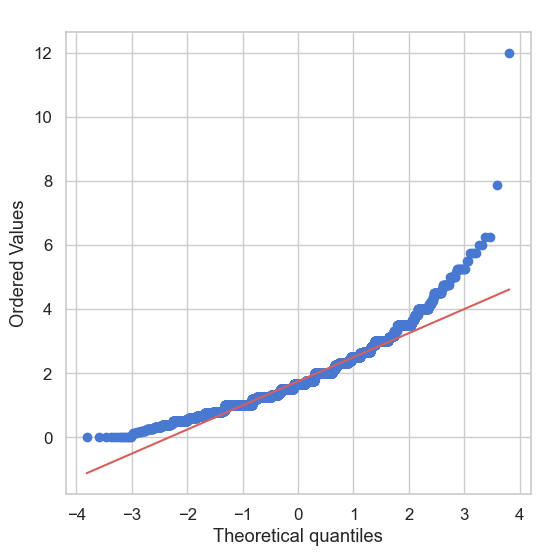

In [15]:
grade_cols = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "EST_IDADE", "EST_RENDA_PER_CAP", "EST_CELULAR_PER_CAP","EST_COMP_PER_CAP", "EST_VEICULO_PER_CAP", "EST_ELE_DOM_PER_CAP"]

for col in grade_cols:
    plt.figure(figsize=(6, 6))
    probplot(df_enem[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ-Plot - {col}", fontsize=14, color="white")
    plt.show()